In [ ]:
!pip3 install gdown
!gdown https://drive.google.com/file/d/1Y25en48feU-AAa19Zidpxw-1jfez88Vc/view?usp=sharing


/usr/local/lib/python2.7/dist-packages/gdown/parse_url.py:31: UserWarning: You specified Google Drive Link but it is not the correct link to download the file. Maybe you should try: https://drive.google.com/uc?id=1Y25en48feU-AAa19Zidpxw-1jfez88Vc
  .format(url='https://drive.google.com/uc?id={}'.format(file_id))
Downloading...
From: https://drive.google.com/file/d/1Y25en48feU-AAa19Zidpxw-1jfez88Vc/view?usp=sharing
To: /content/view?usp=sharing
66.6kB [00:00, 9.70MB/s]


# Import Statements

In [15]:
!gdown --id 1Y25en48feU-AAa19Zidpxw-1jfez88Vc
!gdown --id 1AsbRTEmoamy3KZ-8TW8DldeKHEVoUZSb

import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import classification_report


Downloading...
From: https://drive.google.com/uc?id=1Y25en48feU-AAa19Zidpxw-1jfez88Vc
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:00<00:00, 179MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AsbRTEmoamy3KZ-8TW8DldeKHEVoUZSb
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 133MB/s] 


In [16]:
df = pd.read_csv('sign_mnist_train.csv')
df_test=pd.read_csv('sign_mnist_test.csv')

# Understanding the data

In [ ]:
print(df_test.shape)   
df.info()      

(7172, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


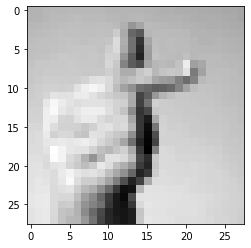

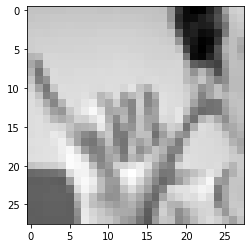

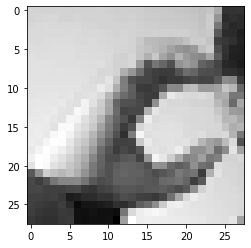

In [ ]:
image = df.values[19, 1:].reshape((28, 28))
plt.imshow(image,cmap='gray')
plt.show()
image = df.values[130, 1:].reshape((28, 28))
plt.imshow(image,cmap='gray')
plt.show()
image = df.values[3, 1:].reshape((28, 28))
plt.imshow(image,cmap='gray')
plt.show()

In [ ]:
df.iloc[:, 0:1]

,label
0,3
1,6
2,2
3,2
4,13
...,...
27450,13
27451,23
27452,18
27453,17


In [ ]:
a = df[df.iloc[:, 0] == 19]
a

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
19,19,173,174,176,177,176,177,177,177,177,177,175,175,175,175,175,174,173,172,172,170,170,170,169,168,168,167,167,166,174,174,176,178,178,179,180,179,178,178,177,...,203,202,201,201,201,201,199,196,195,194,193,191,204,206,207,196,184,176,175,157,134,105,88,81,76,82,186,205,204,203,202,200,200,200,199,197,195,195,193,190
47,19,188,189,192,195,196,195,197,199,200,201,201,200,201,201,200,200,200,199,200,199,197,196,197,196,195,194,193,193,189,191,193,196,197,198,200,201,201,201,201,...,224,224,222,221,222,221,221,220,218,217,217,216,64,64,67,41,28,32,27,51,224,226,225,226,226,226,225,224,224,224,223,222,223,222,220,219,217,217,217,217
55,19,121,129,138,143,148,149,152,156,161,164,168,174,175,177,181,182,185,184,188,190,191,193,193,193,195,195,195,196,122,131,139,146,149,152,157,160,165,169,174,...,228,229,231,232,233,236,236,236,236,236,237,237,157,157,207,209,179,157,130,126,111,86,88,80,176,225,220,224,227,229,231,232,233,236,236,236,236,236,237,237
65,19,169,175,179,183,186,188,192,193,195,197,198,199,199,201,202,202,202,201,200,200,201,200,200,199,197,196,195,194,171,177,181,184,188,190,192,193,197,199,199,...,228,228,227,225,225,225,224,222,221,220,220,217,35,27,21,16,18,4,92,233,217,223,224,224,226,228,228,229,229,227,226,225,225,225,224,223,221,220,218,217
101,19,145,146,148,150,152,154,155,155,156,157,157,159,159,159,159,160,161,163,163,162,161,160,161,161,161,162,163,163,147,149,152,154,155,157,158,158,159,159,160,...,207,208,208,208,208,210,210,210,210,210,210,209,194,197,200,201,194,179,188,190,171,145,120,96,80,74,92,176,209,209,209,209,209,209,210,211,211,211,210,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27389,19,138,139,141,143,145,145,146,146,147,148,149,149,149,149,149,150,150,149,149,149,148,148,150,150,150,150,149,148,139,141,144,145,147,147,148,148,149,150,150,...,89,148,135,141,145,154,141,124,132,141,153,109,83,84,84,85,83,83,85,134,143,124,104,91,70,65,65,56,133,173,169,125,137,135,149,115,125,146,143,96
27405,19,183,184,183,183,184,184,184,183,184,184,184,184,182,181,181,181,179,179,178,177,176,176,174,172,170,169,168,167,185,185,186,187,186,186,185,186,187,185,184,...,61,149,255,243,246,244,242,241,239,238,234,234,255,255,255,255,255,255,242,185,190,197,196,183,152,122,99,79,73,234,251,245,246,244,244,241,239,238,236,232
27431,19,234,233,233,234,234,235,236,237,238,238,237,234,237,235,233,233,233,234,235,234,235,233,232,230,229,229,227,225,236,235,237,236,239,239,237,239,239,238,238,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,246,210,168,184,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,234
27436,19,170,170,170,170,170,170,170,170,170,170,171,170,169,169,169,167,167,166,166,166,164,164,162,161,160,159,157,156,171,171,172,172,172,172,171,172,172,171,171,...,77,138,229,214,217,216,214,213,211,210,209,211,224,224,224,224,224,228,204,164,176,180,178,167,147,123,105,91,88,208,222,216,217,216,215,214,212,212,208,174


In [ ]:
print("Unique values in Train data ",np.unique(df.values[:,0]))
print("Unique values in Test data ",np.unique(df_test.values[:,0]))

Unique values in Train data  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Unique values in Test data  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


# Preprocessing the data

In [17]:

X_train = df.values[:, 1:]
Y_train = df.values[:, 0]
X_test = df_test.values[:, 1:]
Y_test = df_test.values[:, 0]
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


####    Normalising all values between -1 to 1 , using Standard Scaler

In [18]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

print(X_train.shape)
print(X_train[:2])

(27455, 784)
[[-0.92895113 -0.76362507 -0.62085156 ...  0.66406257  0.65811336
   0.65493948]
 [ 0.23165213  0.2128048   0.12168008 ... -0.93157535 -0.41091344
  -0.16809718]]


# Trying different models

## Applying Logistic Regression on the model

In [ ]:
from sklearn.linear_model import LogisticRegression


log_model = LogisticRegression(random_state=0,max_iter=400,penalty='none').fit(X_train,Y_train)


In [ ]:
Y_test_pred = log_model.predict(X_test)


Accuracy score :  0.6529559397657557


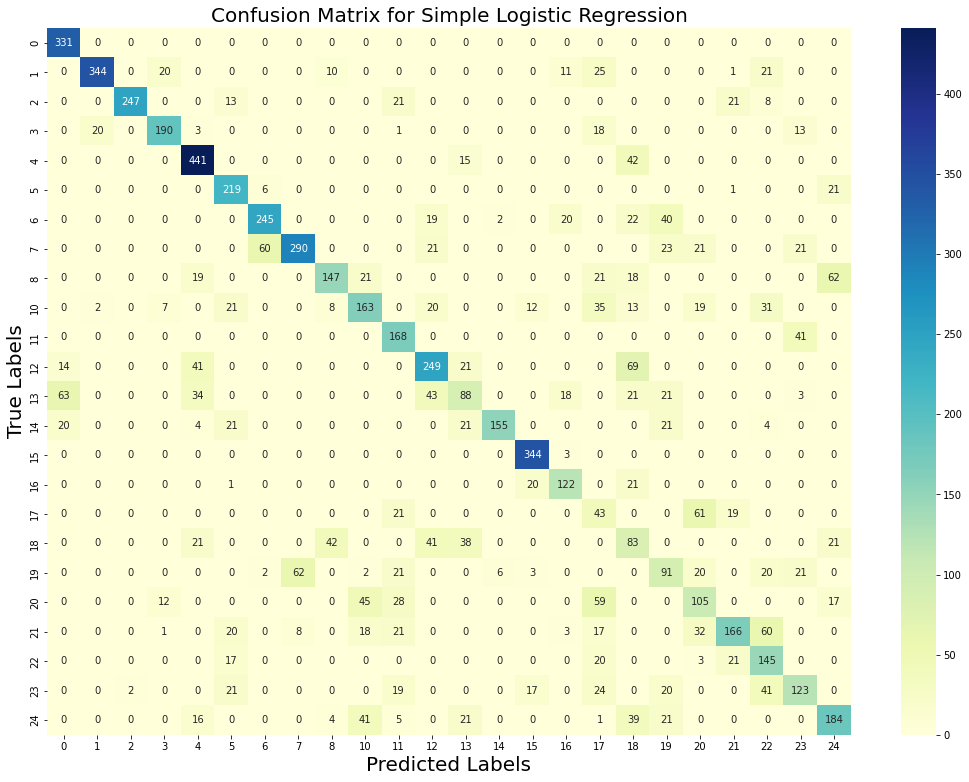


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       331
           1       0.94      0.80      0.86       432
           2       0.99      0.80      0.88       310
           3       0.83      0.78      0.80       245
           4       0.76      0.89      0.82       498
           5       0.66      0.89      0.76       247
           6       0.78      0.70      0.74       348
           7       0.81      0.67      0.73       436
           8       0.70      0.51      0.59       288
          10       0.56      0.49      0.52       331
          11       0.55      0.80      0.65       209
          12       0.63      0.63      0.63       394
          13       0.43      0.30      0.36       291
          14       0.95      0.63      0.76       246
          15       0.87      0.99      0.93       347
          16       0.69      0.74      0.72       164
          17       0.16      0.30      0.21       144
   

In [ ]:
cf_matrix=confusion_matrix(Y_test, Y_test_pred)
print("Accuracy score : " , accuracy_score(Y_test, Y_test_pred))
labels=np.unique(Y_train)
cf_df=pd.DataFrame(cf_matrix,index=labels,columns=labels)
plt.figure(figsize = (18,13))
plt.title("Confusion Matrix for Simple Logistic Regression",fontsize=20)

ax=sns.heatmap(cf_df,annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Labels",fontsize=20)
plt.ylabel("True Labels",fontsize=20)
plt.show()
print("\nCLASSIFICATION REPORT\n")
print(classification_report(Y_test, Y_test_pred))


#### Logisitic Regression with L2 regularisation

In [ ]:
log_model_l2 = LogisticRegression(random_state=0,max_iter=400,penalty='l2',C=0.01).fit(X_train,Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy score :  0.7064974902398216


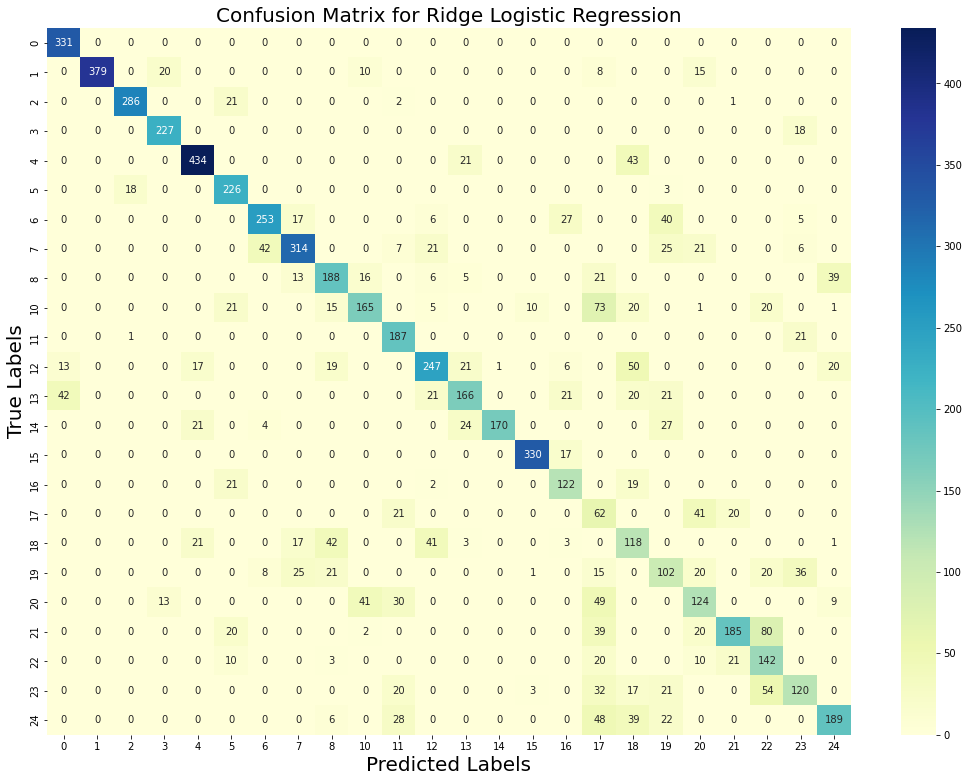


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       331
           1       1.00      0.88      0.93       432
           2       0.94      0.92      0.93       310
           3       0.87      0.93      0.90       245
           4       0.88      0.87      0.88       498
           5       0.71      0.91      0.80       247
           6       0.82      0.73      0.77       348
           7       0.81      0.72      0.76       436
           8       0.64      0.65      0.65       288
          10       0.71      0.50      0.58       331
          11       0.63      0.89      0.74       209
          12       0.71      0.63      0.66       394
          13       0.69      0.57      0.63       291
          14       0.99      0.69      0.82       246
          15       0.96      0.95      0.96       347
          16       0.62      0.74      0.68       164
          17       0.17      0.43      0.24       144
   

In [ ]:
Y_test_pred = log_model_l2.predict(X_test)
cf_matrix=confusion_matrix(Y_test, Y_test_pred)
print("Accuracy score : " , accuracy_score(Y_test, Y_test_pred))
labels=np.unique(Y_train)
cf_df=pd.DataFrame(cf_matrix,index=labels,columns=labels)
plt.figure(figsize = (18,13))
plt.title("Confusion Matrix for Ridge Logistic Regression",fontsize=20)
ax=sns.heatmap(cf_df,annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Labels",fontsize=20)
plt.ylabel("True Labels",fontsize=20)
plt.show()
print("\nCLASSIFICATION REPORT\n")
print(classification_report(Y_test, Y_test_pred))


#### Logisitic Regression with L1 regularisation

In [ ]:
log_model_l1 = LogisticRegression(random_state=0,max_iter=400,penalty='l1',solver='liblinear').fit(X_train,Y_train)


Accuracy score :  0.6330172894590073


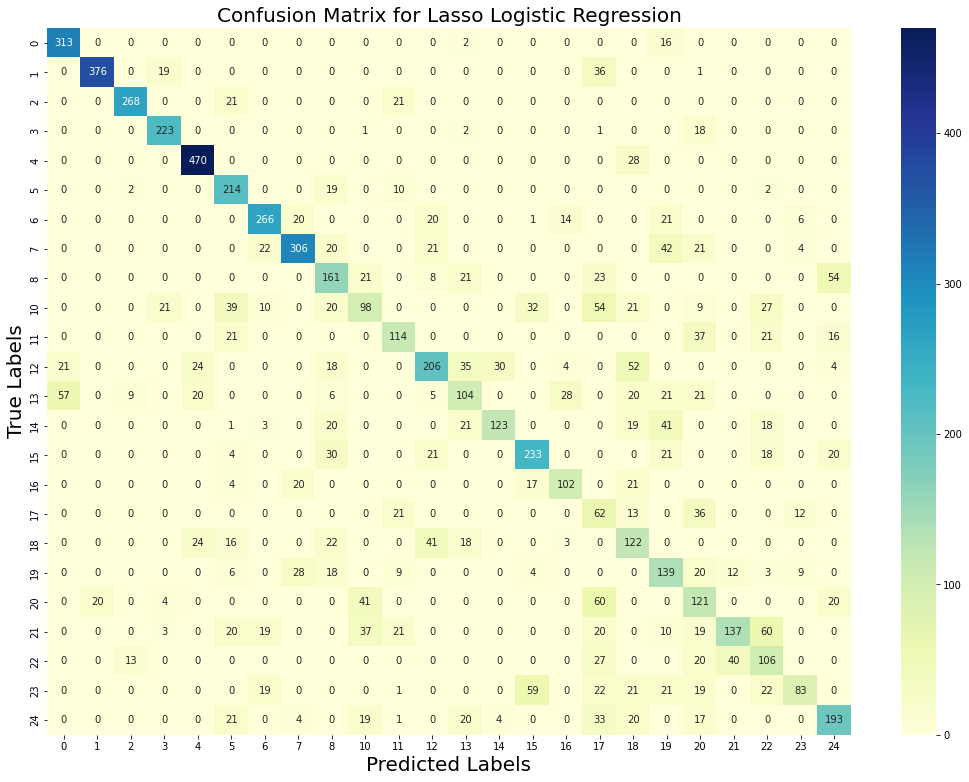


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       331
           1       0.95      0.87      0.91       432
           2       0.92      0.86      0.89       310
           3       0.83      0.91      0.87       245
           4       0.87      0.94      0.91       498
           5       0.58      0.87      0.70       247
           6       0.78      0.76      0.77       348
           7       0.81      0.70      0.75       436
           8       0.48      0.56      0.52       288
          10       0.45      0.30      0.36       331
          11       0.58      0.55      0.56       209
          12       0.64      0.52      0.58       394
          13       0.47      0.36      0.40       291
          14       0.78      0.50      0.61       246
          15       0.67      0.67      0.67       347
          16       0.68      0.62      0.65       164
          17       0.18      0.43      0.26       144
   

In [ ]:
Y_test_pred = log_model_l1.predict(X_test)
cf_matrix=confusion_matrix(Y_test, Y_test_pred)
print("Accuracy score : " , accuracy_score(Y_test, Y_test_pred))
labels=np.unique(Y_train)
cf_df=pd.DataFrame(cf_matrix,index=labels,columns=labels)
plt.figure(figsize = (18,13))
plt.title("Confusion Matrix for Lasso Logistic Regression",fontsize=20)
ax=sns.heatmap(cf_df,annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Labels",fontsize=20)
plt.ylabel("True Labels",fontsize=20)
plt.show()
print("\nCLASSIFICATION REPORT\n")
print(classification_report(Y_test, Y_test_pred))


##  Decision Tree  model

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, Y_train)


In [ ]:
Y_test_pred = tree_model.predict(X_test)
print(tree_model.score(X_test,Y_test))

0.4347462353597323


Accuracy score :  0.4347462353597323


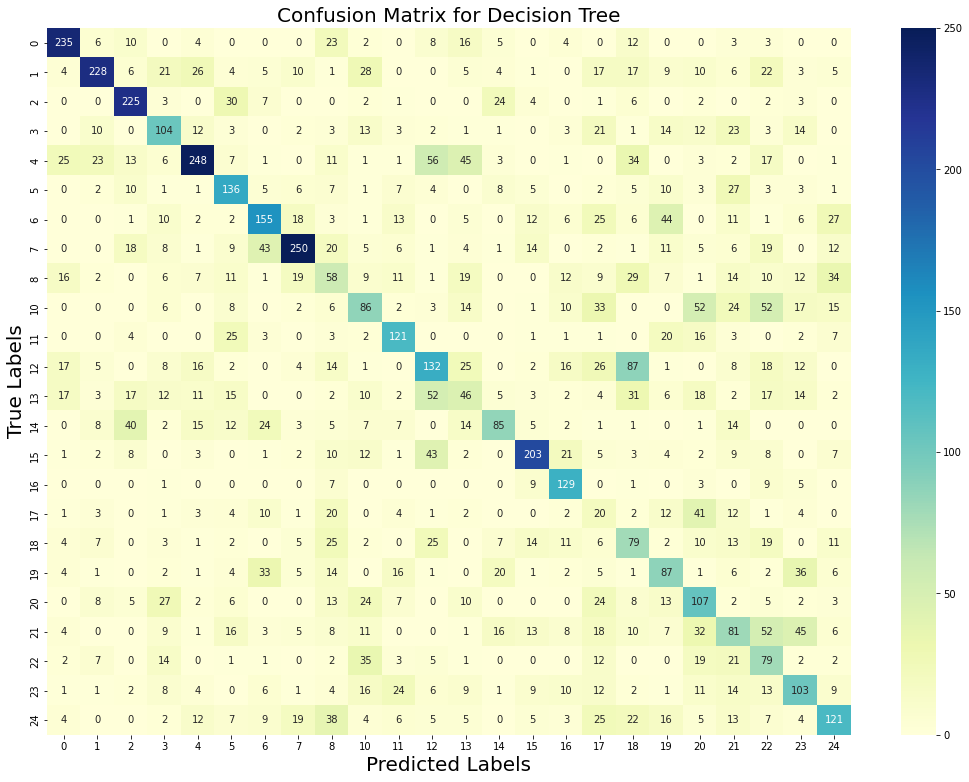


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       331
           1       0.72      0.53      0.61       432
           2       0.63      0.73      0.67       310
           3       0.41      0.42      0.42       245
           4       0.67      0.50      0.57       498
           5       0.45      0.55      0.49       247
           6       0.50      0.45      0.47       348
           7       0.71      0.57      0.63       436
           8       0.20      0.20      0.20       288
          10       0.32      0.26      0.29       331
          11       0.51      0.58      0.55       209
          12       0.38      0.34      0.36       394
          13       0.21      0.16      0.18       291
          14       0.47      0.35      0.40       246
          15       0.67      0.59      0.63       347
          16       0.53      0.79      0.63       164
          17       0.07      0.14      0.10       144
   

In [ ]:
cf_matrix=confusion_matrix(Y_test, Y_test_pred)
print("Accuracy score : " , accuracy_score(Y_test, Y_test_pred))
labels=np.unique(Y_train)
cf_df=pd.DataFrame(cf_matrix,index=labels,columns=labels)
plt.figure(figsize = (18,13))
plt.title("Confusion Matrix for Decision Tree",fontsize=20)
ax=sns.heatmap(cf_df,annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Labels",fontsize=20)
plt.ylabel("True Labels",fontsize=20)
plt.show()
print("\nCLASSIFICATION REPORT\n")
print(classification_report(Y_test, Y_test_pred))



## Ensembling On Decision Tree model (Random Forest Classifier)

In [ ]:
from sklearn.ensemble import  RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(), {
        'n_estimators': [80, 100, 120, 200, 300],
        'criterion': ['entropy','gini'],
           'max_depth': [2, 4, 10, 18, 30]
}, cv=5, return_train_score=False)
clf.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 10, 18, 30],
                         'n_estimators': [80, 100, 120, 200, 300]})

In [ ]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 300}

In [ ]:
rf_model_tuned = RandomForestClassifier(n_estimators=300, criterion='entropy',max_depth=30, random_state=0)
rf_model_tuned.fit(X_train, Y_train)
Y_pred_rf_tuned = rf_model_tuned.predict(X_test)

Accuracy score :  0.8149749023982152


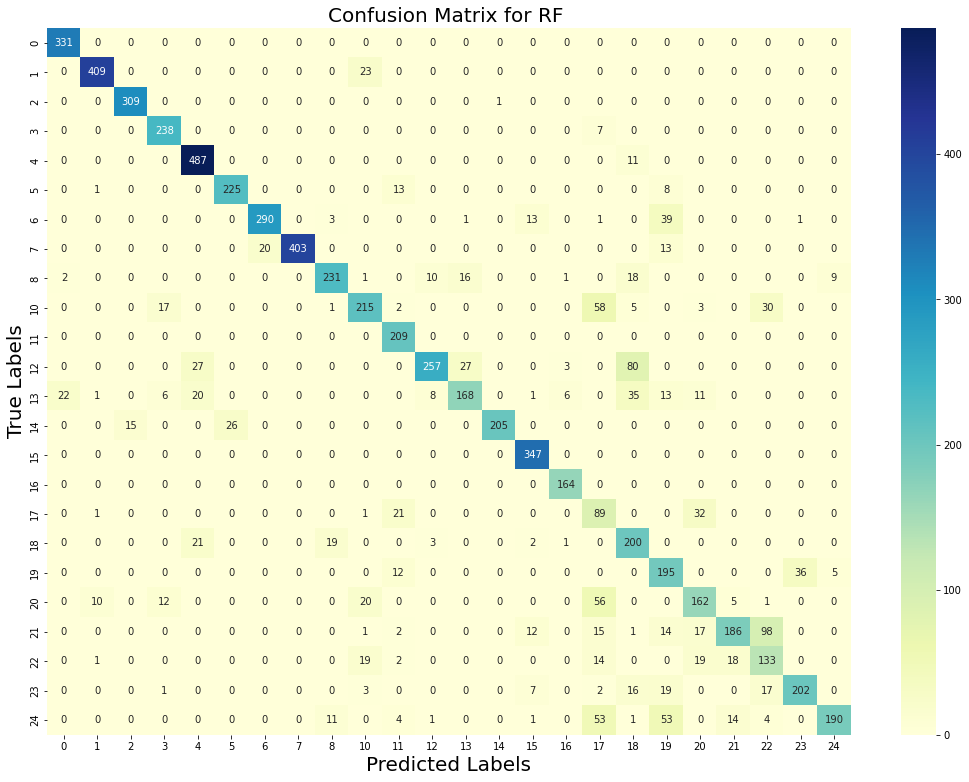


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       331
           1       0.97      0.95      0.96       432
           2       0.95      1.00      0.97       310
           3       0.87      0.97      0.92       245
           4       0.88      0.98      0.92       498
           5       0.90      0.91      0.90       247
           6       0.94      0.83      0.88       348
           7       1.00      0.92      0.96       436
           8       0.87      0.80      0.84       288
          10       0.76      0.65      0.70       331
          11       0.79      1.00      0.88       209
          12       0.92      0.65      0.76       394
          13       0.79      0.58      0.67       291
          14       1.00      0.83      0.91       246
          15       0.91      1.00      0.95       347
          16       0.94      1.00      0.97       164
          17       0.30      0.62      0.41       144
   

In [ ]:
cf_matrix=confusion_matrix(Y_test, Y_pred_rf_tuned)
print("Accuracy score : " , accuracy_score(Y_test, Y_pred_rf_tuned))
labels=np.unique(Y_train)
cf_df=pd.DataFrame(cf_matrix,index=labels,columns=labels)
plt.figure(figsize = (18,13))
plt.title("Confusion Matrix for RF ",fontsize=20)
ax=sns.heatmap(cf_df,annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Labels",fontsize=20)
plt.ylabel("True Labels",fontsize=20)
plt.show()
print("\nCLASSIFICATION REPORT\n")
print(classification_report(Y_test, Y_pred_rf_tuned))

In [ ]:
print("\nCLASSIFICATION REPORT for RF classifier\n")
print(classification_report(Y_test, Y_pred_rf))


CLASSIFICATION REPORT for RF classifier

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       331
           1       0.96      0.92      0.94       432
           2       0.94      0.99      0.97       310
           3       0.87      0.98      0.92       245
           4       0.91      0.97      0.94       498
           5       0.90      0.91      0.91       247
           6       0.91      0.85      0.88       348
           7       0.99      0.92      0.95       436
           8       0.74      0.76      0.75       288
          10       0.73      0.72      0.72       331
          11       0.80      1.00      0.89       209
          12       0.85      0.64      0.73       394
          13       0.69      0.58      0.63       291
          14       0.99      0.85      0.91       246
          15       0.92      1.00      0.96       347
          16       0.93      0.99      0.96       164
          17       0.37      0.67      

## SVM


In [ ]:
from sklearn import svm

In [ ]:
svm_model = svm.SVC()
svm_model.fit(X_train, Y_train)

SVC()

In [ ]:
Y_test_pred = svm_model.predict(X_test)
print(svm_model.score(X_test,Y_test))

0.848856664807585


Accuracy score :  0.848856664807585


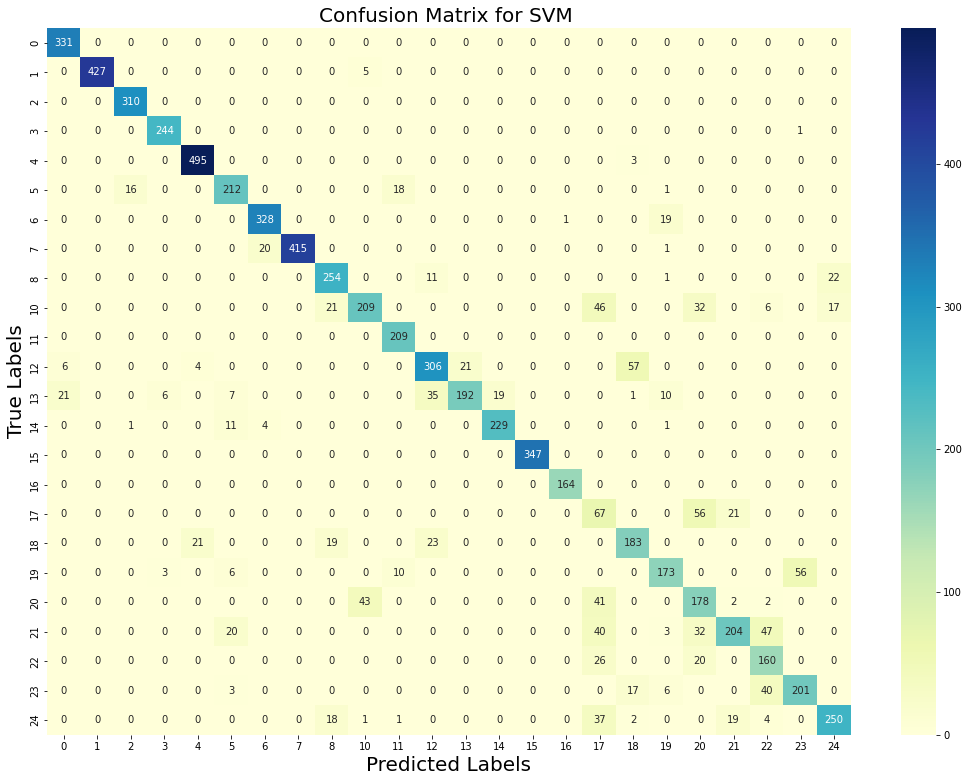


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       331
           1       1.00      0.99      0.99       432
           2       0.95      1.00      0.97       310
           3       0.96      1.00      0.98       245
           4       0.95      0.99      0.97       498
           5       0.82      0.86      0.84       247
           6       0.93      0.94      0.94       348
           7       1.00      0.95      0.98       436
           8       0.81      0.88      0.85       288
          10       0.81      0.63      0.71       331
          11       0.88      1.00      0.94       209
          12       0.82      0.78      0.80       394
          13       0.90      0.66      0.76       291
          14       0.92      0.93      0.93       246
          15       1.00      1.00      1.00       347
          16       0.99      1.00      1.00       164
          17       0.26      0.47      0.33       144
   

In [ ]:
cf_matrix=confusion_matrix(Y_test, Y_test_pred)
print("Accuracy score : " , accuracy_score(Y_test, Y_test_pred))
labels=np.unique(Y_train)
cf_df=pd.DataFrame(cf_matrix,index=labels,columns=labels)
plt.figure(figsize = (18,13))
plt.title("Confusion Matrix for SVM ",fontsize=20)
ax=sns.heatmap(cf_df,annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Labels",fontsize=20)
plt.ylabel("True Labels",fontsize=20)
plt.show()
print("\nCLASSIFICATION REPORT\n")
print(classification_report(Y_test, Y_test_pred))

## Applying MLP classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
mlpc = MLPClassifier(hidden_layer_sizes=(600,650,700),activation='relu').fit(X_train,Y_train)
print(mlpc.score(X_test,Y_test))

0.8565253764640268


Accuracy score :  0.8565253764640268


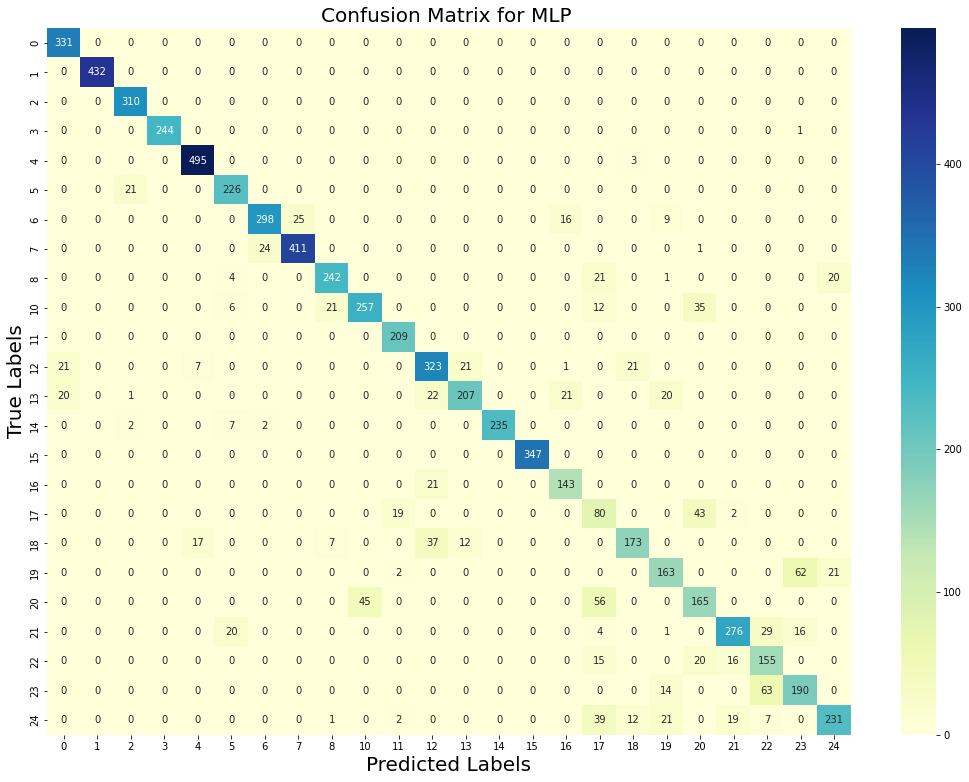


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       331
           1       1.00      1.00      1.00       432
           2       0.93      1.00      0.96       310
           3       1.00      1.00      1.00       245
           4       0.95      0.99      0.97       498
           5       0.86      0.91      0.89       247
           6       0.92      0.86      0.89       348
           7       0.94      0.94      0.94       436
           8       0.89      0.84      0.87       288
          10       0.85      0.78      0.81       331
          11       0.90      1.00      0.95       209
          12       0.80      0.82      0.81       394
          13       0.86      0.71      0.78       291
          14       1.00      0.96      0.98       246
          15       1.00      1.00      1.00       347
          16       0.79      0.87      0.83       164
          17       0.35      0.56      0.43       144
   

In [ ]:
Y_test_pred=mlpc.predict(X_test)
cf_matrix=confusion_matrix(Y_test, Y_test_pred)
print("Accuracy score : " , accuracy_score(Y_test, Y_test_pred))
labels=np.unique(Y_train)
cf_df=pd.DataFrame(cf_matrix,index=labels,columns=labels)
plt.figure(figsize = (18,13))
plt.title("Confusion Matrix for MLP ",fontsize=20)
ax=sns.heatmap(cf_df,annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Labels",fontsize=20)
plt.ylabel("True Labels",fontsize=20)
plt.show()
print("\nCLASSIFICATION REPORT\n")
print(classification_report(Y_test, Y_test_pred))

## CNN

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [20]:
X_train, X_val, Y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(21964, 784)

In [21]:
X_train, X_val = X_train.reshape(-1,28,28,1), X_val.reshape(-1,28,28,1)

In [22]:
X_test = X_test.reshape(-1, 28, 28, 1)

In [23]:
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)), 
                    MaxPool2D(pool_size=(2, 2), strides=2),
                    #
                    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
                    MaxPool2D(pool_size=(2, 2), strides=2),
                    #
                    Conv2D(filters=256, kernel_size=(3, 3), activation='tanh'),
                    MaxPool2D(pool_size=(2, 2), strides=2),
                    ##

                    Flatten(),

                    ##
                    Dense(64, activation ="relu"),
                    #
                    Dense(128, activation ="tanh"),
                    #
                    Dense(128, activation ="tanh"),
                    #
                    Dense(25, activation ="softmax")
])

In [24]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, Y_train, batch_size = 512, epochs =20, verbose = 1, validation_data = (X_val, y_val))

Epoch 1/20
43/43 [==============================] - 12s 57ms/step - loss: 2.4199 - accuracy: 0.3176 - val_loss: 1.5170 - val_accuracy: 0.5706
Epoch 2/20
43/43 [==============================] - 2s 38ms/step - loss: 1.0243 - accuracy: 0.7322 - val_loss: 0.6615 - val_accuracy: 0.8412
Epoch 3/20
43/43 [==============================] - 2s 38ms/step - loss: 0.4624 - accuracy: 0.9044 - val_loss: 0.3070 - val_accuracy: 0.9490
Epoch 4/20
43/43 [==============================] - 2s 37ms/step - loss: 0.2162 - accuracy: 0.9721 - val_loss: 0.1404 - val_accuracy: 0.9898
Epoch 5/20
43/43 [==============================] - 2s 38ms/step - loss: 0.0998 - accuracy: 0.9945 - val_loss: 0.0707 - val_accuracy: 0.9965
Epoch 6/20
43/43 [==============================] - 2s 38ms/step - loss: 0.0477 - accuracy: 0.9989 - val_loss: 0.0371 - val_accuracy: 0.9995
Epoch 7/20
43/43 [==============================] - 2s 38ms/step - loss: 0.0279 - accuracy: 0.9999 - val_loss: 0.0247 - val_accuracy: 0.9995
Epoch 8/20
4

Text(0.5, 1.0, 'Accuracy evolution')

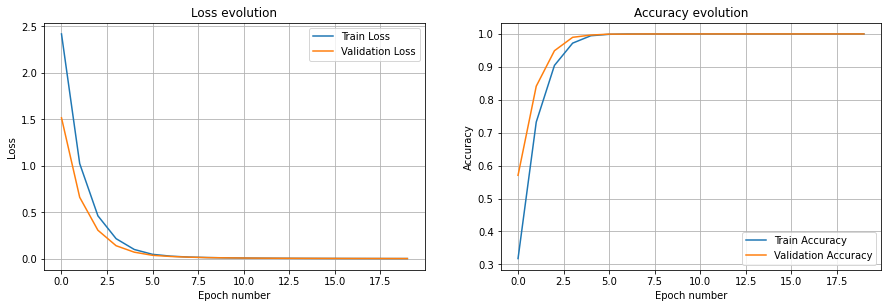

In [26]:
#Visualizing the training performance
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid()
plt.xlabel("Epoch number")
plt.ylabel("Loss")
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epoch number")
plt.ylabel("Accuracy")
plt.grid()
plt.title('Accuracy evolution')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 256)        0

In [28]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)
print(loss, accuracy)



225/225 [==============================] - 1s 5ms/step - loss: 0.1859 - accuracy: 0.9550
0.1858731508255005 0.954963743686676


In [29]:
Y_test_pred=model.predict(X_test)
Y_test_pred=np.argmax(Y_test_pred,axis=1)



Accuracy score :  0.9549637479085332


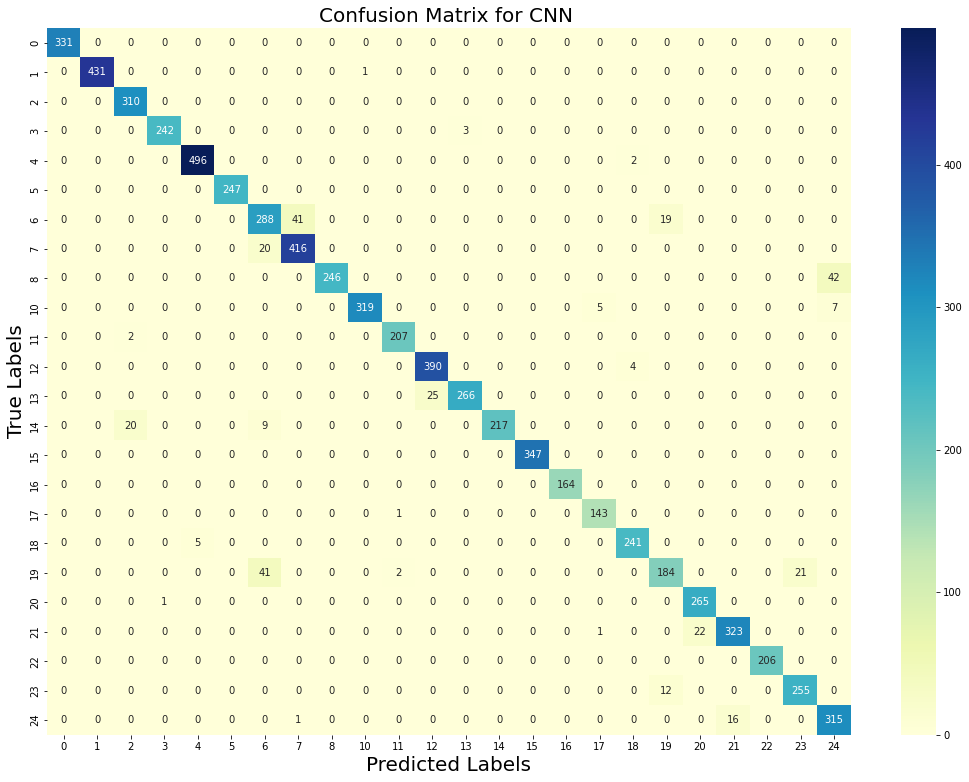


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       0.93      1.00      0.97       310
           3       1.00      0.99      0.99       245
           4       0.99      1.00      0.99       498
           5       1.00      1.00      1.00       247
           6       0.80      0.83      0.82       348
           7       0.91      0.95      0.93       436
           8       1.00      0.85      0.92       288
          10       1.00      0.96      0.98       331
          11       0.99      0.99      0.99       209
          12       0.94      0.99      0.96       394
          13       0.99      0.91      0.95       291
          14       1.00      0.88      0.94       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       0.96      0.99      0.98       144
   

In [30]:
cf_matrix=confusion_matrix(Y_test, Y_test_pred)
print("Accuracy score : " , accuracy_score(Y_test, Y_test_pred))
labels=np.unique(Y_train)
cf_df=pd.DataFrame(cf_matrix,index=labels,columns=labels)
plt.figure(figsize = (18,13))
plt.title("Confusion Matrix for CNN ",fontsize=20)
ax=sns.heatmap(cf_df,annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Labels",fontsize=20)
plt.ylabel("True Labels",fontsize=20)
plt.show()
print("\nCLASSIFICATION REPORT\n")
print(classification_report(Y_test, Y_test_pred))

# Reading live image

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


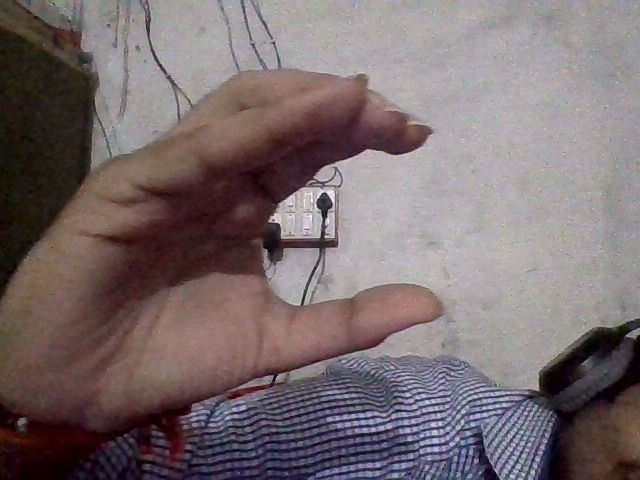

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import cv2
pic=cv2.imread("photo.jpg")
print(pic.shape)
pic_array_format = cv2.resize(pic, (28, 28))
pic_array_format = cv2.cvtColor(pic_array_format,cv2.COLOR_RGB2GRAY)
pic_array_format = np.reshape(pic_array_format,(1,pic_array_format.shape[0],pic_array_format.shape[1],1))
#pred = model.predict_classes(X_test)          
pred = model.predict(pic_array_format)
np.argmax(pred)

(480, 640, 3)


2

## We notice that the captured images is classified to label 2 , which is the label for letter C . Thus our model correctly classifies even live images.

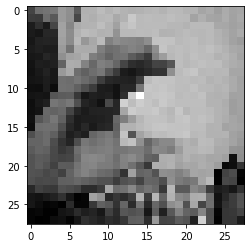

In [ ]:
image = thresholded.reshape((28, 28))
plt.imshow(image,cmap='gray')
plt.show()
